In [ ]:
 # Importing Libraries

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, accuracy_score, roc_curve,plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Loading Data

full_data = pd.read_csv("/content/drive/MyDrive/Heart Attack Analysis/heart (1).csv")
full_data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:

# Understanding data
print(full_data.head(3))
print("\nNumber of rows:",full_data.shape[0])
print("Number of columns:",full_data.shape[1])
print("Column names: ",list(full_data.columns))



   age  sex  cp  trtbps  chol  fbs  ...  exng  oldpeak  slp  caa  thall  output
0   63    1   3     145   233    1  ...     0      2.3    0    0      1       1
1   37    1   2     130   250    0  ...     0      3.5    0    0      2       1
2   41    0   1     130   204    0  ...     0      1.4    2    0      2       1

[3 rows x 14 columns]

Number of rows: 303
Number of columns: 14
Column names:  ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output']


In [ ]:
# Data Description
full_data.describe().T.style.bar(subset=['mean'],color='Green').background_gradient(subset=['std'],cmap='Reds')

,count,mean,std,min,25%,50%,75%,max
age,303.000000,54.366337,9.082101,29.000000,47.500000,55.000000,61.000000,77.000000
sex,303.000000,0.683168,0.466011,0.000000,0.000000,1.000000,1.000000,1.000000
cp,303.000000,0.966997,1.032052,0.000000,0.000000,1.000000,2.000000,3.000000
trtbps,303.000000,131.623762,17.538143,94.000000,120.000000,130.000000,140.000000,200.000000
chol,303.000000,246.264026,51.830751,126.000000,211.000000,240.000000,274.500000,564.000000
fbs,303.000000,0.148515,0.356198,0.000000,0.000000,0.000000,0.000000,1.000000
restecg,303.000000,0.528053,0.525860,0.000000,0.000000,1.000000,1.000000,2.000000
thalachh,303.000000,149.646865,22.905161,71.000000,133.500000,153.000000,166.000000,202.000000
exng,303.000000,0.326733,0.469794,0.000000,0.000000,0.000000,1.000000,1.000000
oldpeak,303.000000,1.039604,1.161075,0.000000,0.000000,0.800000,1.600000,6.200000


In [ ]:
# checking NaN values

full_data.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [ ]:
# Function for checking outlier
def outlier_check(var):
  L_outlier = []
  R_outlier = []
  data = sorted(full_data[var])
  q1,q3 =  np.percentile(data,[25,75])
  iqr_val = q3-q1
  lower_bond = q1-(1.5*iqr_val)
  upper_bond = q3+(1.5*iqr_val)
  for i in data:
    if i<lower_bond:
      L_outlier.append(i)
    elif i>upper_bond:
      R_outlier.append(i)
  print("1st Quartile : ",q1,"\n3rd Quartile : ",q3)
  print("Inter quartile range : ",iqr_val)
  print("minimum value : ",min(data))
  print("maximum value : ",max(data))
  
  print("Lower bond value: ",lower_bond,"\nUpper bond value : ",upper_bond)
  print("Left Outlier: ",L_outlier)
  print("Right Outlier: ",R_outlier)
  #plt.boxplot(data, notch = True, vert = False)
  plt.boxplot(data,patch_artist = True,vert = False,
           boxprops = dict(facecolor = 'red', color = 'red'),
           whiskerprops = dict(color = 'green'),
           capprops = dict(color = 'blue'),
           medianprops = dict(color = 'yellow'))
  print("-------Outlier detection for column ",var,"-------")
  plt.show()




 

1st Quartile :  47.5 
3rd Quartile :  61.0
Inter quartile range :  13.5
minimum value :  29
maximum value :  77
Lower bond value:  27.25 
Upper bond value :  81.25
Left Outlier:  []
Right Outlier:  []
-------Outlier detection for column  age -------


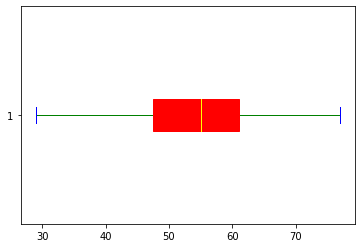

In [ ]:
outlier_check('age')

1st Quartile :  120.0 
3rd Quartile :  140.0
Inter quartile range :  20.0
minimum value :  94
maximum value :  200
Lower bond value:  90.0 
Upper bond value :  170.0
Left Outlier:  []
Right Outlier:  [172, 174, 178, 178, 180, 180, 180, 192, 200]
-------Outlier detection for column  trtbps -------


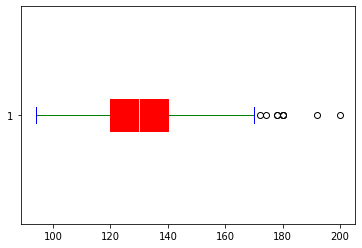

In [ ]:
outlier_check('trtbps')

1st Quartile :  211.0 
3rd Quartile :  274.5
Inter quartile range :  63.5
minimum value :  126
maximum value :  564
Lower bond value:  115.75 
Upper bond value :  369.75
Left Outlier:  []
Right Outlier:  [394, 407, 409, 417, 564]
-------Outlier detection for column  chol -------


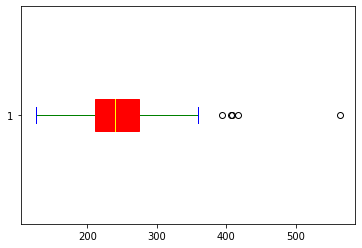

In [ ]:
outlier_check('chol')

1st Quartile :  133.5 
3rd Quartile :  166.0
Inter quartile range :  32.5
minimum value :  71
maximum value :  202
Lower bond value:  84.75 
Upper bond value :  214.75
Left Outlier:  [71]
Right Outlier:  []
-------Outlier detection for column  thalachh -------


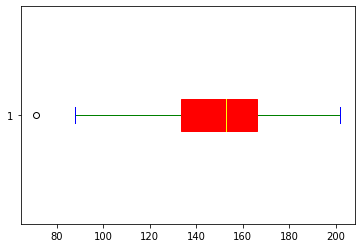

In [ ]:
outlier_check('thalachh')

1st Quartile :  0.0 
3rd Quartile :  1.6
Inter quartile range :  1.6
minimum value :  0.0
maximum value :  6.2
Lower bond value:  -2.4000000000000004 
Upper bond value :  4.0
Left Outlier:  []
Right Outlier:  [4.2, 4.2, 4.4, 5.6, 6.2]
-------Outlier detection for column  oldpeak -------


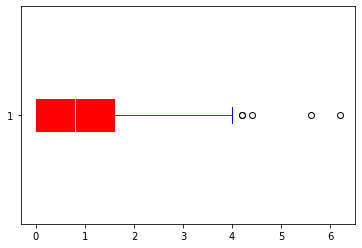

In [ ]:
outlier_check('oldpeak')

In [ ]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

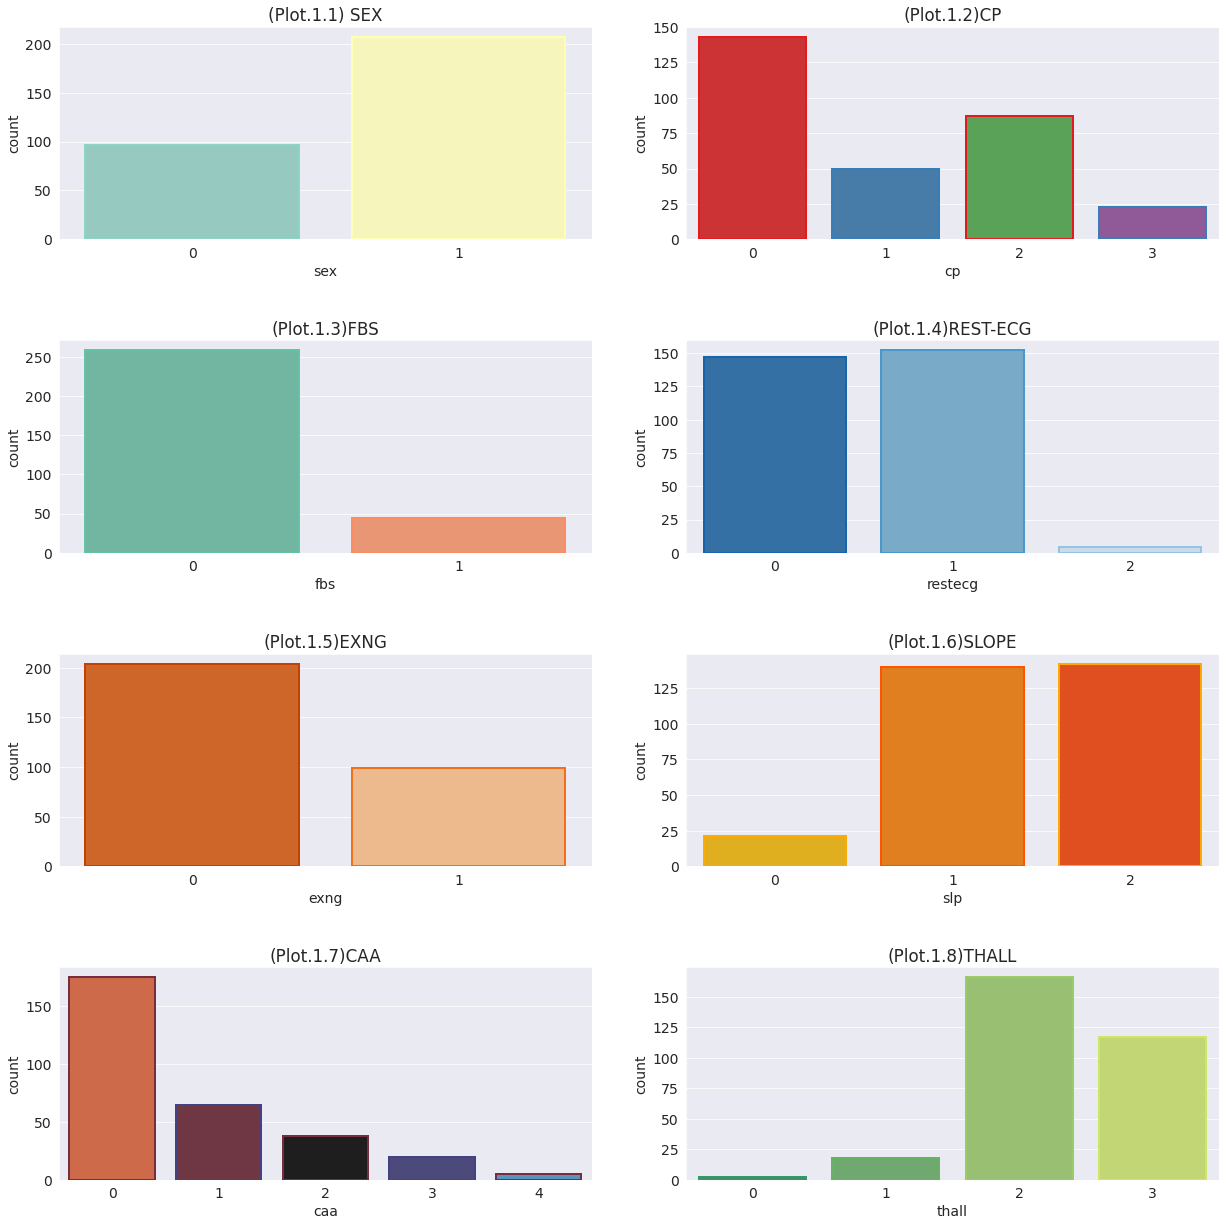

In [ ]:
# Univariate Analysis of Categorical Variables
fig, axes = plt.subplots(4,2, figsize=(18,18))

#use the axis for plotting
axes[0, 0].set_title('(Plot.1.1) SEX')
sns.countplot(full_data.sex,
              palette = 'Set3',
              edgecolor=sns.color_palette("Set3", 4),
              linewidth=2,
             ax=axes[0,0]);


#use the axis for plotting
axes[0, 1].set_title('(Plot.1.2)CP')
sns.countplot(full_data.cp,
              palette = 'Set1',
              edgecolor=sns.color_palette("Set1", 2),
              linewidth=2,
             ax=axes[0,1]);


#use the axis for plotting
axes[1, 0].set_title('(Plot.1.3)FBS')
sns.countplot(full_data.fbs,
              palette = 'Set2',
              edgecolor=sns.color_palette("Set2", 2),
              linewidth=2,
             ax=axes[1,0]);


#use the axis for plotting
axes[1, 1].set_title('(Plot.1.4)REST-ECG')
sns.countplot(full_data.restecg,
              palette = 'Blues_r',
              edgecolor=sns.color_palette('Blues_r', 4),
              linewidth=2,
             ax=axes[1,1]);


#use the axis for plotting
axes[2, 0].set_title('(Plot.1.5)EXNG')
sns.countplot(full_data.exng,
              palette = 'Oranges_r',
              edgecolor=sns.color_palette('Oranges_r', 4),
              linewidth=2,
             ax=axes[2,0]);


#use the axis for plotting
axes[2, 1].set_title('(Plot.1.6)SLOPE')
sns.countplot(full_data.slp,
              palette = 'autumn_r',
              edgecolor=sns.color_palette('autumn_r', 2),
              linewidth=2,
             ax=axes[2,1]);


#use the axis for plotting
axes[3, 0].set_title('(Plot.1.7)CAA')
sns.countplot(full_data.caa,
              palette = 'icefire_r',
              edgecolor=sns.color_palette('icefire_r', 2),
              linewidth=2,
             ax=axes[3,0]);


axes[3, 1].set_title('(Plot.1.8)THALL')
sns.countplot(full_data.thall,
              palette = 'summer',
              edgecolor=sns.color_palette('summer', 4),
              linewidth=2,
             ax=axes[3,1]);

plt.tight_layout(pad=3);

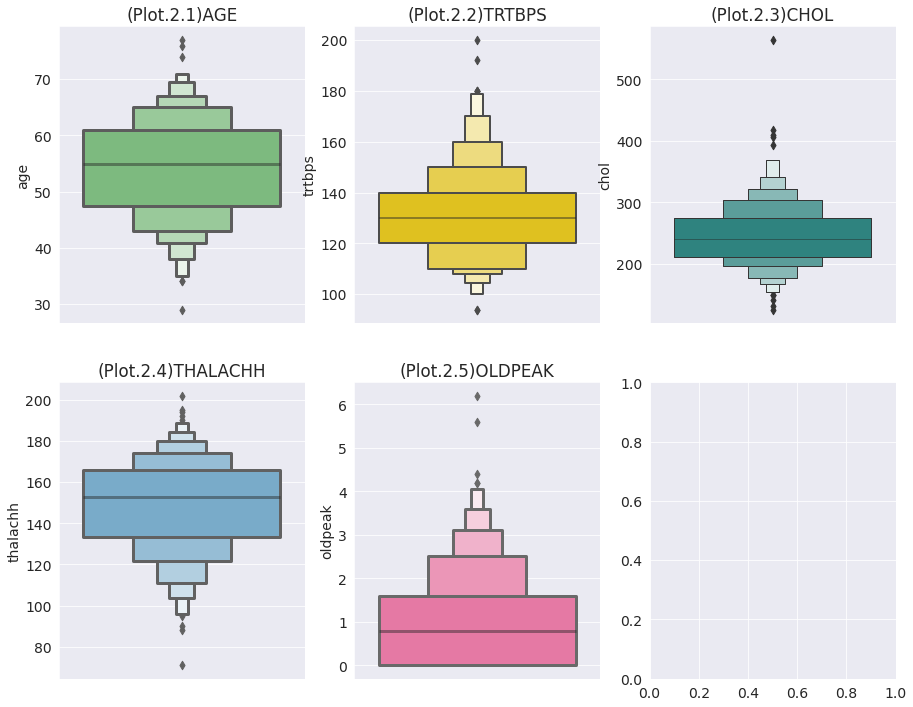

In [ ]:
# Univariate Analysis of Continuous and Target Variables
fig, axes = plt.subplots(2,3, figsize=(15,12))

#use the axis for plotting
axes[0, 0].set_title('(Plot.2.1)AGE')
sns.boxenplot(y=full_data.age,
            palette='Greens', 
            color='red',
           linewidth=3,
           ax=axes[0,0]);


#use the axis for plotting
axes[0,1].set_title('(Plot.2.2)TRTBPS')
sns.boxenplot(y=full_data.trtbps,
            palette='prism', 
            color='red',
           linewidth=2,
           ax=axes[0,1]);


#use the axis for plotting
axes[0, 2].set_title('(Plot.2.3)CHOL')
sns.boxenplot(y=full_data.chol,
            palette='viridis',
           linewidth=1,
           ax=axes[0,2]);


#use the axis for plotting
axes[1, 0].set_title('(Plot.2.4)THALACHH')
sns.boxenplot(y=full_data.thalachh,
            palette='Blues_r', 
            color='red',
           linewidth=3,
           ax=axes[1,0]);


#use the axis for plotting
axes[1, 1].set_title('(Plot.2.5)OLDPEAK')
sns.boxenplot(y=full_data.oldpeak,
            palette='RdPu', 
            color='red',
           linewidth=3,
           ax=axes[1,1]);


-----Distribution of target variable-----
1    165
0    138
Name: output, dtype: int64


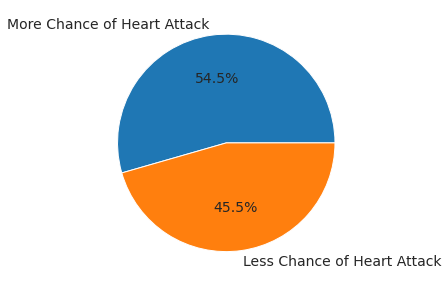

In [ ]:
print("-----Distribution of target variable-----")
#sns.countplot(full_data['output'])

value_count = full_data['output'].value_counts()
print(value_count)
h_attack = ["More Chance of Heart Attack","Less Chance of Heart Attack"]
plt.pie(value_count,labels = h_attack,autopct='%0.1f%%')
plt.show()

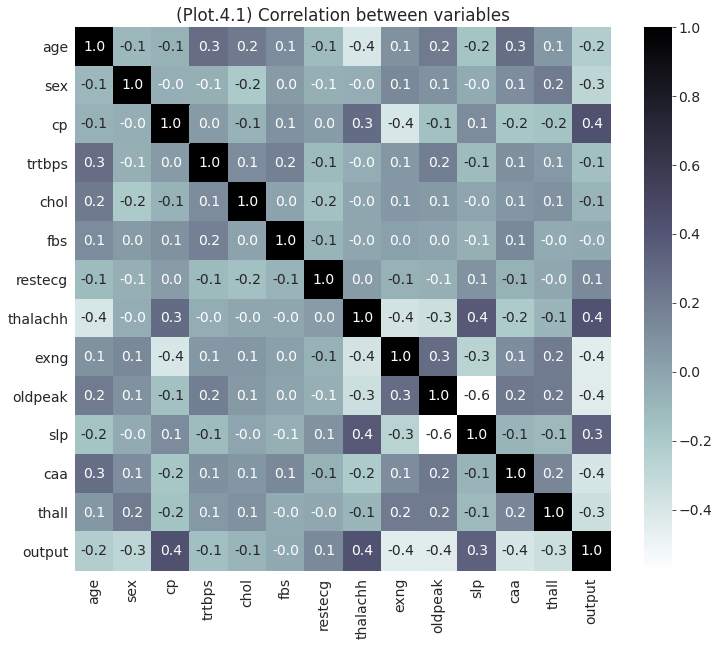

In [ ]:
plt.figure(figsize = (12,10))
plt.title('(Plot.4.1) Correlation between variables')
sns.heatmap(full_data.corr(), fmt='.1f', annot=True, cmap= "bone_r");

In [ ]:
# 01 Logistic Regression
X = full_data.iloc[:,0:13].values
y = full_data.iloc[:,13].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=0)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train) # it keeps the value in a range
X_test = sc_X.fit_transform(X_test)


from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train) # model will learn form X_train and y_train

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix :\n",cm)
ac = accuracy_score(y_test,y_pred)
print("Accuracy :",ac)

Confusion Matrix :
 [[24  9]
 [ 4 39]]
Accuracy : 0.8289473684210527


In [ ]:
# 02 Decision Tree
X = full_data.iloc[:,0:13].values
y = full_data.iloc[:,13].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=0)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train) # it keeps the value in a range
X_test = sc_X.fit_transform(X_test)


from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n",cm)
ac = accuracy_score(y_test,y_pred)
print("Accuracy :",ac)

Confusion Matrix:
 [[25  8]
 [ 7 36]]
Accuracy : 0.8026315789473685


In [ ]:
# 03 Random Forest
X = full_data.iloc[:,0:13].values
y = full_data.iloc[:,13].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=0)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train) # it keeps the value in a range
X_test = sc_X.fit_transform(X_test)


from sklearn.ensemble import RandomForestClassifier # It is created with many decision tree
classifier = RandomForestClassifier(n_estimators=10) # How many tree we want to take
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n",cm)
ac = accuracy_score(y_test,y_pred)
print("Accuracy:",ac)

Confusion Matrix:
 [[26  7]
 [ 6 37]]
Accuracy: 0.8289473684210527


In [ ]:
# 04 Support Vector Classifier
X = full_data.iloc[:,0:13].values
y = full_data.iloc[:,13].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=0)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train) # it keeps the value in a range
X_test = sc_X.fit_transform(X_test)


from sklearn.svm import SVC # Support Vector Classifier
classifier = SVC()
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n",cm)
ac = accuracy_score(y_test,y_pred)
print("Accuracy :",ac)


Confusion Matrix:
 [[25  8]
 [ 3 40]]
Accuracy : 0.8552631578947368


In [ ]:
# 05 KNN- KNeighborsClassifier Model 
X = full_data.iloc[:,0:13].values
y = full_data.iloc[:,13].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=0)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train) # it keeps the value in a range
X_test = sc_X.fit_transform(X_test)


from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5) # How many neighbors we want to take
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n",cm)
ac = accuracy_score(y_test,y_pred)
print("Accuracy :",ac)

Confusion Matrix:
 [[27  6]
 [ 4 39]]
Accuracy : 0.868421052631579


In [ ]:
# 06 naive_bayes / GaussianNB Model
X = full_data.iloc[:,0:13].values
y = full_data.iloc[:,13].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=0)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train) # it keeps the value in a range
X_test = sc_X.fit_transform(X_test)


from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n",cm)
ac = accuracy_score(y_test,y_pred)
print("Accuracy :",ac)


Confusion Matrix:
 [[25  8]
 [ 8 35]]
Accuracy : 0.7894736842105263
